<a href="https://colab.research.google.com/github/wizard339/education/blob/main/sklearn_umap_tfidf_kmeans_bbc_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install datasets umap-learn > /dev/null
import pandas as pd, os
from tqdm import tqdm
import numpy as np
import datasets

#Pandas Df
We will read train text into a Pandas df.

In [3]:
from datasets import load_dataset

dataset = load_dataset("SetFit/bbc-news")

train_text_df = pd.DataFrame({'text': dataset['train']['text']})
train_text_df.head()

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/SetFit___json/SetFit--bbc-news-dbeb222bfdd4d6ed/0.0.0/0f7e3662623656454fcd2b650f34e886a7db4b9104504885bd462096cc7a9f51. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

,text
0,wales want rugby league training wales could f...
1,china aviation seeks rescue deal scandal-hit j...
2,rock band u2 break ticket record u2 have smash...
3,markets signal brazilian recovery the brazilia...
4,tough rules for ringtone sellers firms that fl...


#Tfidf
We will use Tfidf to convert each text into a embedding vector of length 25,000.

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english', binary=True, max_features=25_000)
text_embeddings = tfidf.fit_transform( train_text_df['text'] ).toarray()

# UMAP
We will use UMAP (Uniform Manifold Approximation and Projection for Dimension Reduction) to reduce embedding vectors to two dimensions

In [5]:
from umap import UMAP
umap = UMAP()
embed_2d = umap.fit_transform(text_embeddings)

# KMeans
We will use KMeans to find clusters of essays. These are the essay topics!

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(embed_2d)
train_text_df['cluster'] = kmeans.labels_

# Display Topics
We will display the result of UMAP which reduced text to two dimension.

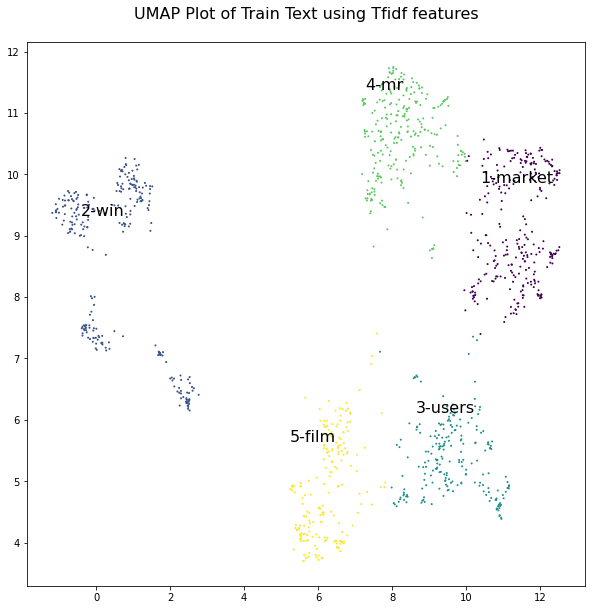

<Figure size 432x288 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt

centers = kmeans.cluster_centers_

plt.figure(figsize=(10,10))
plt.scatter(embed_2d[:,0], embed_2d[:,1], s=1, c=kmeans.labels_)
plt.title('UMAP Plot of Train Text using Tfidf features\n',size=16)

for k in range(len(centers)):
    mm = np.mean( text_embeddings[train_text_df.cluster.values==k],axis=0 )
    ii = np.argmax(mm)
    top_word = list(tfidf.vocabulary_.keys())[list(tfidf.vocabulary_.values()).index(ii)]
    plt.text(centers[k,0]-1,centers[k,1]+0.75,f'{k+1}-{top_word}',size=16)

plt.show()
plt.savefig('clusters.png')

# Display Example Text
We will display three example text from each topic. And we will display the five most important words from each topic.

In [8]:
for k in range(5):
    mm = np.mean( text_embeddings[train_text_df.cluster.values==k],axis=0 )
    ii = ( np.argsort(mm)[-5:][::-1] )
    top_words = [list(tfidf.vocabulary_.keys())[list(tfidf.vocabulary_.values()).index(i)] for i in ii]
    print('#'*25)
    print(f'### Topic {k+1}')
    print('### Top 5 Words',top_words)
    print('#'*25)
    tmp = train_text_df.loc[train_text_df.cluster==k].sample(3, random_state=123)
    for j in range(3):
        txt = tmp.iloc[j,0]
        print('-'*10,f'Example {j+1}','-'*10)
        print(txt,'\n')

#########################
### Topic 1
### Top 5 Words ['market', 'growth', 'company', 'economy', 'said']
#########################
---------- Example 1 ----------
russia wto talks  make progress  talks on russia s proposed membership of the world trade organisation (wto) have been  making good progress  say those behind the negotiations.  but the chairman of the working party  ambassador stefan johannesson of iceland  warned that there was  still a lot of work has to be done . his comments came as president george w bush said the us backed russian entry. but he said for russia to make progress the government must  renew a commitment to democracy and the rule of law . his comments come three days before he is due to meet president vladimir putin.  russia has been waiting for a decade to join the wto and hopes to finally become a member by early 2006. a decision could be reached in december  when the wto s 148 current members gather for a summit in hong kong. that would allow an earliest